In [1]:
# Step 1: Import necessary libraries
#provides built-in datasets like iris.
from sklearn import datasets 
#splits data into training and testing.
from sklearn.model_selection import train_test_split
#Support Vector Classifier from scikit-learn.
from sklearn.svm import SVC
#to measure how well the model predicts.
from sklearn.metrics import accuracy_score
#for visualizing data
import matplotlib.pyplot as plt
       

In [2]:
# Step 2: Load the iris dataset
iris = datasets.load_iris()

In [4]:
#Step3
X = iris.data[:, 2:4]
y = iris.target

In [5]:
#y contains only labels 0 and 1
#X contains only the rows (samples) that match those labels
# The Iris dataset originally contains three classes:
# 0 → Setosa
# 1 → Versicolor
# 2 → Virginica
# So we use this filtering to remove class 2 and make it binary classification.
#why? SVM (Support Vector Machine) is easier to visualize and explain in binary classification

# Step 4: For binary classification, use only two classes
X = X[y != 2]
y = y[y != 2]


In [7]:
# Step 5: Split the data into training and test sets
#Without random_state, every time you run your code, the 70/30 split picks different samples randomly.
#With random_state=42, the exact same 70 samples go to training and the same 30 samples go to testing every time you run the code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
# Step 6: Create the SVM model
#SVC: Support Vector Classifier.
#kernel='linear': tells the model to find a straight line (linear boundary).
#C=1.0: regularization parameter. Lower C = softer margin (allow some misclassifications).
model = SVC(kernel='linear', C=1.0)

In [9]:
# Step 7: Train the model on the training data
model.fit(X_train, y_train)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [10]:
# Step 8: Predict the test data
y_pred = model.predict(X_test)


In [11]:
# Step 9: Check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


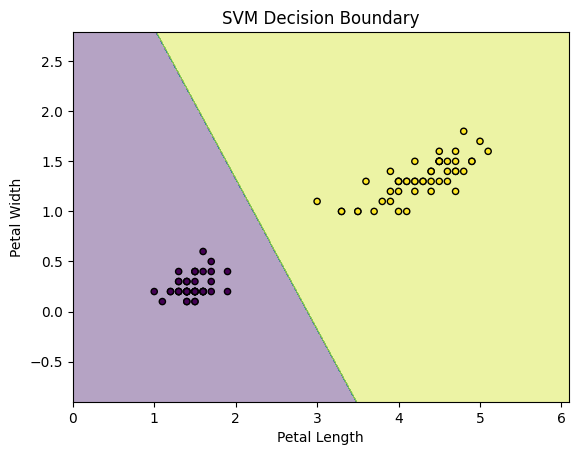

In [12]:
# Plotting the decision boundary (for 2D only)
import numpy as np

# Create a grid of points to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("SVM Decision Boundary")
plt.show()
